In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

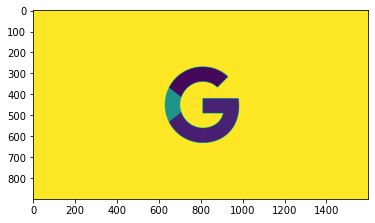

In [9]:
# Diagnostic data

img = cv2.imread("google_logo.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)
plt.show()

sift = cv2.SIFT_create()
kp = sift.detect(img_gray,None)
img=cv2.drawKeypoints(img_gray,kp,img)
cv2.imwrite('sift_keypoints.jpg',img)

In [39]:
 def compareImages(path):
    img1 = cv2.imread(path,cv2.IMREAD_GRAYSCALE) 
    img2 = cv2.imread('login/microsoft_login.PNG',cv2.IMREAD_GRAYSCALE) 
    img3 = cv2.imread('login/google_login.jpg',cv2.IMREAD_GRAYSCALE) 
    # Initiate SIFT detector
    sift = cv2.SIFT_create()
    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)
    kp3, des3 = sift.detectAndCompute(img3,None)
    # BFMatcher with default params
    bf = cv2.BFMatcher()
    matches1 = bf.knnMatch(des1,des2,k=2)
    matches2 = bf.knnMatch(des1,des3,k=2)
    # Apply ratio test
    good1 = []
    good2 = []
    for m,n in matches1:
        if m.distance < 0.75*n.distance:
            good1.append([m])
    for m,n in matches2:
        if m.distance < 0.75*n.distance:
            good2.append([m])
    if len(good1)==0 and len(good2)==0:
        print("No matches")
    elif len(good1)>len(good2):
        # cv.drawMatchesKnn expects list of lists as matches.
        img4 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good1,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
        plt.imshow(img4),plt.show()

        print("Image matches microsoft login")
    else:
        # cv.drawMatchesKnn expects list of lists as matches.
        img4 = cv2.drawMatchesKnn(img1,kp1,img3,kp3,good2,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
        plt.imshow(img4),plt.show()

        print("Image matches google login")

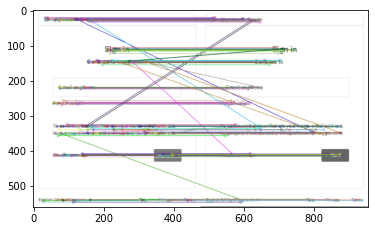

Image matches google login


In [40]:
# Put the image in the sample folder and pass it in as the 1st parameter

compareImages('sample/google.PNG')